# Laboratorium 4 - Julia

In [ ]:
Pkg.add("DifferentialEquations")
Pkg.add("DataFrames")
Pkg.add("Gadfly")
Pkg.add("CSV")

In [1]:
using Gadfly
using DataFrames
using DifferentialEquations
using CSV

## Zadanie 1.

In [ ]:
f = @ode_def_nohes LotkaVolterra begin
    d*x = a*x - b*x*y
    d*y = -c*y + d*x*y
end a b c d

 A (the growth rate of prey)<br>
 B (the rate at which predators destroy prey)<br>
 C (the death rate of predators)<br>
 D (the rate at which predators increase by consuming prey)<br>

In [2]:
function LotkaVolterra(du, u, p, t)
    du[1] = p[1] * u[1] - p[2] * u[1] * u[2]
    du[2] = -p[3] * u[2] + p[4] * u[1] * u[2]
end

LotkaVolterra (generic function with 1 method)

In [3]:
function LotkaVolterraEquationsSolver(tspan, p, u0)
    prob = ODEProblem(LotkaVolterra,u0,tspan,p)
    sollution = solve(prob, RK4(), dt = 1)
    return sollution
end 

LotkaVolterraEquationsSolver (generic function with 1 method)

In [4]:
function LVEStoFile(tspan, p, u0, exp)
    sollution = LotkaVolterraEquationsSolver(tspan, p, u0)
    df = DataFrame(t = sollution.t, x = map(x -> x[1], sollution.u), y = map(y -> y[2], sollution.u), experiment = exp)
    CSV.write("$(exp).csv", df)
end

LVEStoFile (generic function with 1 method)

In [5]:
u0 = [8.0, 4.0]
tspan = (0.0, 1.0)

(0.0, 1.0)

In [6]:
p = [1.5, 1.0, 3.0, 1.0]
LVEStoFile(tspan, p, u0, "exp_sample")

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "exp_sample.csv", 17, true, String["t", "x", "y", "experiment"], 4, false, Val{false})

## Generowanie danych do zadania 2.

In [7]:
tspan = (0.0, 40.0)

(0.0, 40.0)

In [8]:
u0 = [3.0, 5.0]
p = [1.0, 1.0, 1.0, 1.0]
LVEStoFile(tspan, p, u0, "exp_1")

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "exp_1.csv", 17, true, String["t", "x", "y", "experiment"], 4, false, Val{false})

In [9]:
u0 = [3.0, 5.0]
p = [4.0, 4.0, 2.0, 1.0]
LVEStoFile(tspan, p, u0, "exp_2")

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "exp_2.csv", 17, true, String["t", "x", "y", "experiment"], 4, false, Val{false})

In [10]:
u0 = [3.0, 5.0]
p = [3.0, 1.0, 3.0, 1.0]
LVEStoFile(tspan, p, u0, "exp_3")

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "exp_3.csv", 17, true, String["t", "x", "y", "experiment"], 4, false, Val{false})

In [11]:
u0 = [3.0, 5.0]
p = [1.0, 2.0, 3.0, 4.0]
LVEStoFile(tspan, p, u0, "exp_4")

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "exp_4.csv", 17, true, String["t", "x", "y", "experiment"], 4, false, Val{false})

## Zadanie 2.

In [12]:
myData1 = CSV.read("exp_1.csv")
myData2 = CSV.read("exp_2.csv")
myData3 = CSV.read("exp_3.csv")
myData4 = CSV.read("exp_4.csv")

allData = vcat(myData1, myData2, myData3, myData4)

,t,x,y,experiment
1,0.0,3.0,5.0,exp_1
2,0.086974,2.04978,5.70046,exp_1
3,0.119584,1.75339,5.86997,exp_1
4,0.178761,1.30629,6.05347,exp_1
5,0.228622,1.0138,6.10015,exp_1
6,0.294133,0.72673,6.04523,exp_1
7,0.360753,0.521711,5.89332,exp_1
8,0.425236,0.38299,5.68732,exp_1
9,0.491504,0.283002,5.44033,exp_1
10,0.558384,0.212171,5.17261,exp_1


In [13]:
DataFrames.aggregate(allData[:, [:x, :y, :experiment]], :experiment, [minimum, maximum, mean])

,experiment,x_minimum,y_minimum,x_maximum,y_maximum,x_mean,y_mean
1,exp_1,0.013872,0.0138727,6.09723,6.10015,1.47596,1.89663
2,exp_2,0.00561965,0.0334011,15.8934,5.05751,2.79246,1.7658
3,exp_3,1.62136,1.6224,4.99612,5.0,2.98386,3.14884
4,exp_4,0.00589966,1.78342e-6,5.06927,7.64037,1.21503,1.58979


In [14]:
allData[:diff] = allData[:y] - allData[:x]
allData

,t,x,y,experiment,diff
1,0.0,3.0,5.0,exp_1,2.0
2,0.086974,2.04978,5.70046,exp_1,3.65067
3,0.119584,1.75339,5.86997,exp_1,4.11658
4,0.178761,1.30629,6.05347,exp_1,4.74718
5,0.228622,1.0138,6.10015,exp_1,5.08636
6,0.294133,0.72673,6.04523,exp_1,5.3185
7,0.360753,0.521711,5.89332,exp_1,5.3716
8,0.425236,0.38299,5.68732,exp_1,5.30433
9,0.491504,0.283002,5.44033,exp_1,5.15732
10,0.558384,0.212171,5.17261,exp_1,4.96044


## Zadanie 3.

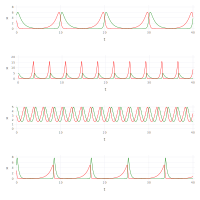

In [15]:
pl1 = plot(layer(myData1, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(myData1, x="t", y="y", Geom.line, Theme(default_color="green")))
pl2 = plot(layer(myData2, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(myData2, x="t", y="y", Geom.line, Theme(default_color="green")))
pl3 = plot(layer(myData3, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(myData3, x="t", y="y", Geom.line, Theme(default_color="green")))
pl4 = plot(layer(myData4, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(myData4, x="t", y="y", Geom.line, Theme(default_color="green")))
set_default_plot_size(20cm, 20cm)
vstack(pl1, pl2, pl3, pl4)

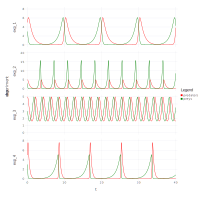

In [16]:
plot(allData, ygroup="experiment", x="t", y="x",
    Geom.subplot_grid(
        layer(Geom.line, Theme(default_color=colorant"green")),
        layer(allData, ygroup="experiment", y="y", Geom.line, Theme(default_color=colorant"red")),
        free_y_axis=true
    ),Guide.manual_color_key("Legend", ["predators", "preys"], ["red", "green"])
)

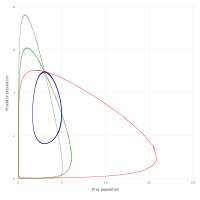

In [17]:
dataFrames = Vector()
push!(dataFrames, myData1)
push!(dataFrames, myData2)
push!(dataFrames, myData3)
push!(dataFrames, myData4)

layers = Vector()
labels = Vector()
usedColors = Vector()
colors = ["green", "red", "darkblue","grey"]
i = 1

for (iDataFrame, i) in zip(dataFrames, 1:length(dataFrames))
    push!(layers, layer(iDataFrame, x=:x, y=:y, Theme(default_color=colors[i]) , Geom.path))
    push!(usedColors, colors[i])
end


plot(layers..., Guide.xlabel("Prey population"), Guide.ylabel("Predator population"))